In [1]:
import numpy as np

In [63]:
K = 5
N = 20
values = np.random.rand(N)
sensitivities = 0.2 + 0.8 * np.random.rand(N)

In [64]:
def v_function(item, B):
    p = B + 1 / sensitivities[item]
    return np.exp(values[item] - sensitivities[item] * p) / sensitivities[item]

In [88]:
def rhs(B):
    v_values = np.array([v_function(i, B) for i in range(N)])
    top_k = np.argsort(v_values)[-K:]
    return np.sum(v_values[top_k]), tuple(top_k)

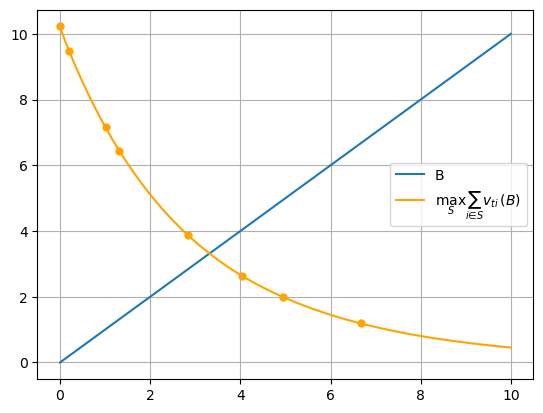

In [105]:
import matplotlib.pyplot as plt
from itertools import groupby

B_range = np.linspace(0, 10, 100)
rhs_values, top_k_values = zip(*[rhs(B) for B in B_range])
plt.plot(B_range, B_range, label="B")
plt.plot(B_range, rhs_values, color="orange", label=r"$\max_{S} \sum_{i \in S} v_{ti}(B)$")

# Iterate over regions with the same top_k_values
start_idx = 0
for key, group in groupby(enumerate(top_k_values), key=lambda x: x[1]):
    indices = [i for i, _ in group]
    plt.scatter(B_range[indices[0]], rhs_values[indices[0]], color="orange", marker=".", s=100)

plt.legend()
plt.grid()

/var/folders/z0/5sxm9mn92r9d1sfww1y5lj640000gn/T/ipykernel_31359/1198623808.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("winter")


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.81, 0.2, '$\\widehat{\\boldsymbol{\\theta}}_t$')

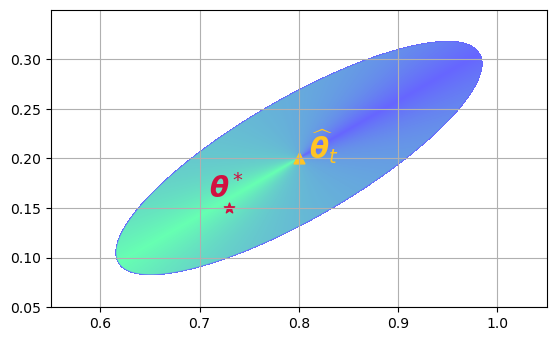

In [121]:
import matplotlib.cm as cm

a_true = 0.73
b_true = 0.15

a_center = 0.8
b_center = 0.2
r_1 = 0.21
r_2 = 0.06
phi = np.pi / 6

cmap = cm.get_cmap("winter")

def color_function(a, b):
    z = (a - a_center) + (b - b_center) * 1j
    z = z * np.exp(phi * 1j)
    h = (z.real / r_1) + (z.imag / r_2) * 1j
    angles_pos = np.angle(h) >= 0
    angles = angles_pos * np.angle(h) + (1 - angles_pos) * (- np.angle(h))
    return angles * (np.abs(h) <= 1)

# make these smaller to increase the resolution
dx, dy = 0.0001, 0.0001

x = np.arange(0.55, 1.05, dx)
y = np.arange(0.05, 0.35, dy)
X, Y = np.meshgrid(x, y)

xmin, xmax, ymin, ymax = np.amin(x), np.amax(x), np.amin(y), np.amax(y)
extent = xmin, xmax, ymin, ymax

colors = color_function(X, Y)

print(colors)

cmap.set_under('w')

plt.grid()
plt.imshow(colors, cmap=cmap, alpha=0.6, extent=extent, vmin=0.001)
plt.scatter(a_true, b_true, color='#d11141', marker="*", s=60)
plt.scatter(a_center, b_center, color='#ffc425', marker="^", s=60)
plt.text(0.71, 0.16, r"$\boldsymbol{\theta}^*$", color='#d11141', fontsize=20)
plt.text(0.81, 0.20, r"$\widehat{\boldsymbol{\theta}}_t$", color='#ffc425', fontsize=20)